In [ ]:
pip install imblearn

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

In [2]:
normal = pd.read_csv('ptbdb_normal.csv')
abnormal = pd.read_csv('ptbdb_abnormal.csv')

# train, test = train_test_split(global_df, test_size = 0.2, random_state = 123)
# train.head()

In [3]:
for normals in normal:
    normal.columns = list(range(len(normal.columns)))
normal.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.948983,0.505265,0.004176,0.022513,0.059550,0.107298,0.110385,0.111293,0.116558,0.118192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
for abnormals in abnormal:
    abnormal.columns = list(range(len(abnormal.columns)))
abnormal.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.925265,0.433352,0.073620,0.079197,0.136643,0.182934,0.182934,0.182376,0.196877,0.203569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
dataset = pd.concat([normal, abnormal], axis=0).sample(frac=1.0, random_state =0).reset_index(drop=True)

In [6]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,...,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.0,14550.000000
mean,0.976638,0.721640,0.403068,0.242859,0.207181,0.216410,0.221718,0.224457,0.227325,0.229684,...,0.001190,0.001133,0.000900,0.000739,0.000661,0.000475,0.000177,0.000185,0.0,0.721993
std,0.034532,0.195694,0.249779,0.249466,0.218030,0.192331,0.180687,0.176900,0.176642,0.176557,...,0.021363,0.021014,0.017317,0.014641,0.014034,0.012290,0.006545,0.006836,0.0,0.448032
min,0.624227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.959381,0.584500,0.212294,0.052278,0.061899,0.090473,0.096495,0.097092,0.097225,0.097127,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,1.000000,0.740115,0.371911,0.168148,0.136082,0.159451,0.167479,0.171541,0.177380,0.180337,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
75%,1.000000,0.881478,0.557741,0.336155,0.264083,0.264610,0.286449,0.302235,0.311657,0.325235,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.985523,0.993213,0.997738,...,0.791899,0.773743,0.789804,0.628177,0.602033,0.644880,0.371502,0.376668,0.0,1.000000


In [7]:
train, test = train_test_split(dataset, test_size = 0.2, random_state = 123)

In [8]:
dataset.skew()

0      -1.996666
1      -0.476897
2       0.522176
3       1.341882
4       1.695414
         ...    
183    33.173038
184    43.456478
185    42.695593
186     0.000000
187    -0.991106
Length: 188, dtype: float64

In [9]:
dataset.kurtosis()

0         6.525932
1        -0.358119
2        -0.432733
3         1.049821
4         2.382486
          ...     
183    1268.425311
184    2057.330509
185    1970.628170
186       0.000000
187      -1.017849
Length: 188, dtype: float64

In [10]:
print(str('Any missing data or NaN in the dataset:'), dataset.isnull().values.any())

Any missing data or NaN in the dataset: False


In [11]:
correlation_data =dataset.corr()
print(correlation_data)

# plt.figure(figsize=(10,7.5))
# sns.heatmap(correlation_data, annot=True, cmap='BrBG')

          0         1         2         3         4         5         6    \
0    1.000000 -0.144659 -0.177473 -0.152565 -0.096012 -0.065027 -0.054873   
1   -0.144659  1.000000  0.751293  0.500776  0.305996  0.212239  0.181912   
2   -0.177473  0.751293  1.000000  0.838456  0.622193  0.472163  0.384679   
3   -0.152565  0.500776  0.838456  1.000000  0.872606  0.688537  0.561440   
4   -0.096012  0.305996  0.622193  0.872606  1.000000  0.894368  0.763562   
..        ...       ...       ...       ...       ...       ...       ...   
183  0.000727 -0.013414 -0.002895  0.013430  0.011029  0.002736 -0.002890   
184 -0.005036 -0.004615 -0.008376 -0.004826 -0.007732 -0.012645 -0.018202   
185 -0.005020 -0.004240 -0.008052 -0.004498 -0.007584 -0.012545 -0.018113   
186       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
187 -0.054400  0.032348  0.227082  0.306628  0.337449  0.276078  0.213135   

          7         8         9    ...       178       179       180  \
0  

In [12]:
label_dataset = dataset[187].value_counts()
label_dataset

1.0    10505
0.0     4045
Name: 187, dtype: int64

<AxesSubplot:>

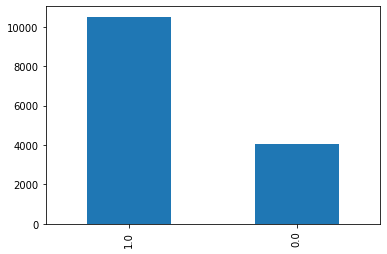

In [13]:
label_dataset.plot.bar()

In [14]:
X = dataset.iloc[:,:-1].values #independent values / features
y = dataset.iloc[:,-1].values #dependent values / target

In [15]:
counter_before = Counter(y)
print(counter_before)

Counter({1.0: 10505, 0.0: 4045})


In [16]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [17]:
counter_after = Counter(y)
print(counter_after)

Counter({1.0: 10505, 0.0: 10505})


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=42)

In [19]:
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

print("X Train shape: ", X_train.shape)
print("X Test shape: ", X_test.shape)

X Train shape:  (14707, 187, 1)
X Test shape:  (6303, 187, 1)


In [20]:
# Create sequential model 
cnn_model = tf.keras.models.Sequential()

#First CNN layer  with 32 filters, conv window 3, relu activation and same padding
cnn_model.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001), input_shape = (X_train.shape[1],1)))

#Second CNN layer  with 64 filters, conv window 3, relu activation and same padding
cnn_model.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))

#Third CNN layer with 128 filters, conv window 3, relu activation and same padding
cnn_model.add(Conv1D(filters=128, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))

#Fourth CNN layer with Max pooling
cnn_model.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
cnn_model.add(Dropout(0.5))

#Flatten the output
cnn_model.add(Flatten())

#Add a dense layer with 256 neurons
cnn_model.add(Dense(units = 256, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))

#Add a dense layer with 512 neurons
cnn_model.add(Dense(units = 512, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))

#Softmax as last layer with five outputs
cnn_model.add(Dense(units = 2, activation='softmax'))

In [21]:
cnn_model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 187, 32)           128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 187, 64)           6208      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 187, 128)          24704     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 94, 128)           0         
_________________________________________________________________
dropout (Dropout)            (None, 94, 128)           0         
_________________________________________________________________
flatten (Flatten)            (None, 12032)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               3

In [23]:
cnn_model_history = cnn_model.fit(X_train, y_train, epochs=10, batch_size = 10, validation_data = (X_test, y_test))

Epoch 1/10
1471/1471 [==============================] - 354s 240ms/step - loss: 0.3049 - accuracy: 0.8678 - val_loss: 0.2232 - val_accuracy: 0.9296
Epoch 2/10
1471/1471 [==============================] - 363s 247ms/step - loss: 0.1235 - accuracy: 0.9540 - val_loss: 0.0943 - val_accuracy: 0.9711
Epoch 3/10
1471/1471 [==============================] - 358s 243ms/step - loss: 0.0761 - accuracy: 0.9727 - val_loss: 0.0696 - val_accuracy: 0.9756
Epoch 4/10
1471/1471 [==============================] - 358s 244ms/step - loss: 0.0526 - accuracy: 0.9821 - val_loss: 0.0342 - val_accuracy: 0.9905
Epoch 5/10
1471/1471 [==============================] - 358s 244ms/step - loss: 0.0368 - accuracy: 0.9881 - val_loss: 0.0485 - val_accuracy: 0.9827
Epoch 6/10
1471/1471 [==============================] - 342s 232ms/step - loss: 0.0293 - accuracy: 0.9913 - val_loss: 0.0254 - val_accuracy: 0.9921
Epoch 7/10
1471/1471 [==============================] - 354s 240ms/step - loss: 0.0307 - accuracy: 0.9897 - val_

In [31]:
def evaluate_model(cnn_model_history,X_test,y_test,cnn_model):
    scores = cnn_model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(cnn_model_history)
    fig1, ax_acc = plt.subplots()
    plt.plot(cnn_model_history.history['accuracy'])
    plt.plot(cnn_model_history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(cnn_model_history.history['loss'])
    plt.plot(cnn_model_history.history['val_loss'])
    plt.show()
    target_names=['0','1']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=cnn_model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    confusion_matrix(y_true, prediction)

Accuracy: 99.38%


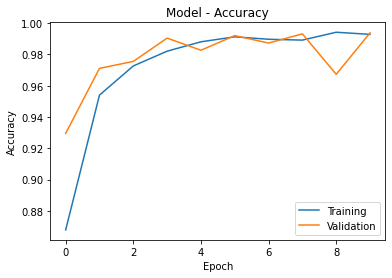

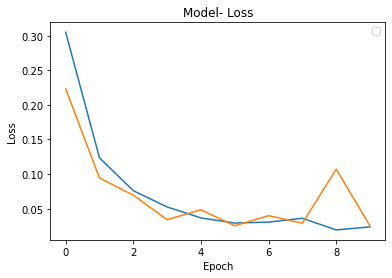

In [35]:
evaluate_model(cnn_model_history,X_test,y_test,cnn_model)
y_pred=cnn_model.predict(X_test)

In [36]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['Abnormal', 'Normal'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()

AxisError: axis 1 is out of bounds for array of dimension 1